In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pp
from sklearn import decomposition as dc
from sklearn.datasets import load_wine
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("/home/mete/Workspace/Okul/Ders/Bil479/Data/train.csv")

In [3]:
df.shape

(1460, 81)

In [5]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
# df.info() çok uzun :D

In [7]:
df_w = df.drop(["LotFrontage", "LotShape", "LandSlope", "LotConfig", "Exterior2nd","BsmtFinType1","BsmtFinSF1",
                "BsmtFinType2","BsmtFinSF2","BsmtUnfSF","LowQualFinSF","BsmtFullBath","BsmtHalfBath","GarageFinish",
                "GarageYrBlt","MiscFeature","Alley"],axis=1).copy()

In [8]:
# kalan NaN değerlerini 0 a eşitledik
df_w = df_w.fillna(0)

In [9]:
#### Sadece numerik verileri kullanırsak PCA başarısı

In [10]:
numerical_features = []
for col in df_w.columns:
    if df_w[col].dtype != "object":
        numerical_features.append(col)

In [11]:
### Sadece numerik değerleri barındıran dataframe (salePrice hariç)
# ":-1" şeklinde slicing uygulayarak hedef değeri (salePrice) PCA dışı bıraktık
numeric_arr = df_w.loc[:,numerical_features[:-1]].values 

In [12]:
# Norm : [0,1]
# Std : [-1,1]

In [13]:
std_numeric_arr = pp.MinMaxScaler(feature_range=(0, 1)).fit_transform(numeric_arr) 
# normalize edilmiş değerleri dataframe olarak sonra kullanmak üzre kaydet
std_numeric_df = pd.DataFrame(data = std_numeric_arr, columns = numerical_features[:-1]) 

In [14]:
pca = dc.PCA(n_components=2)
principalComponents = pca.fit_transform(std_numeric_arr)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, df_w[['SalePrice']]], axis = 1)

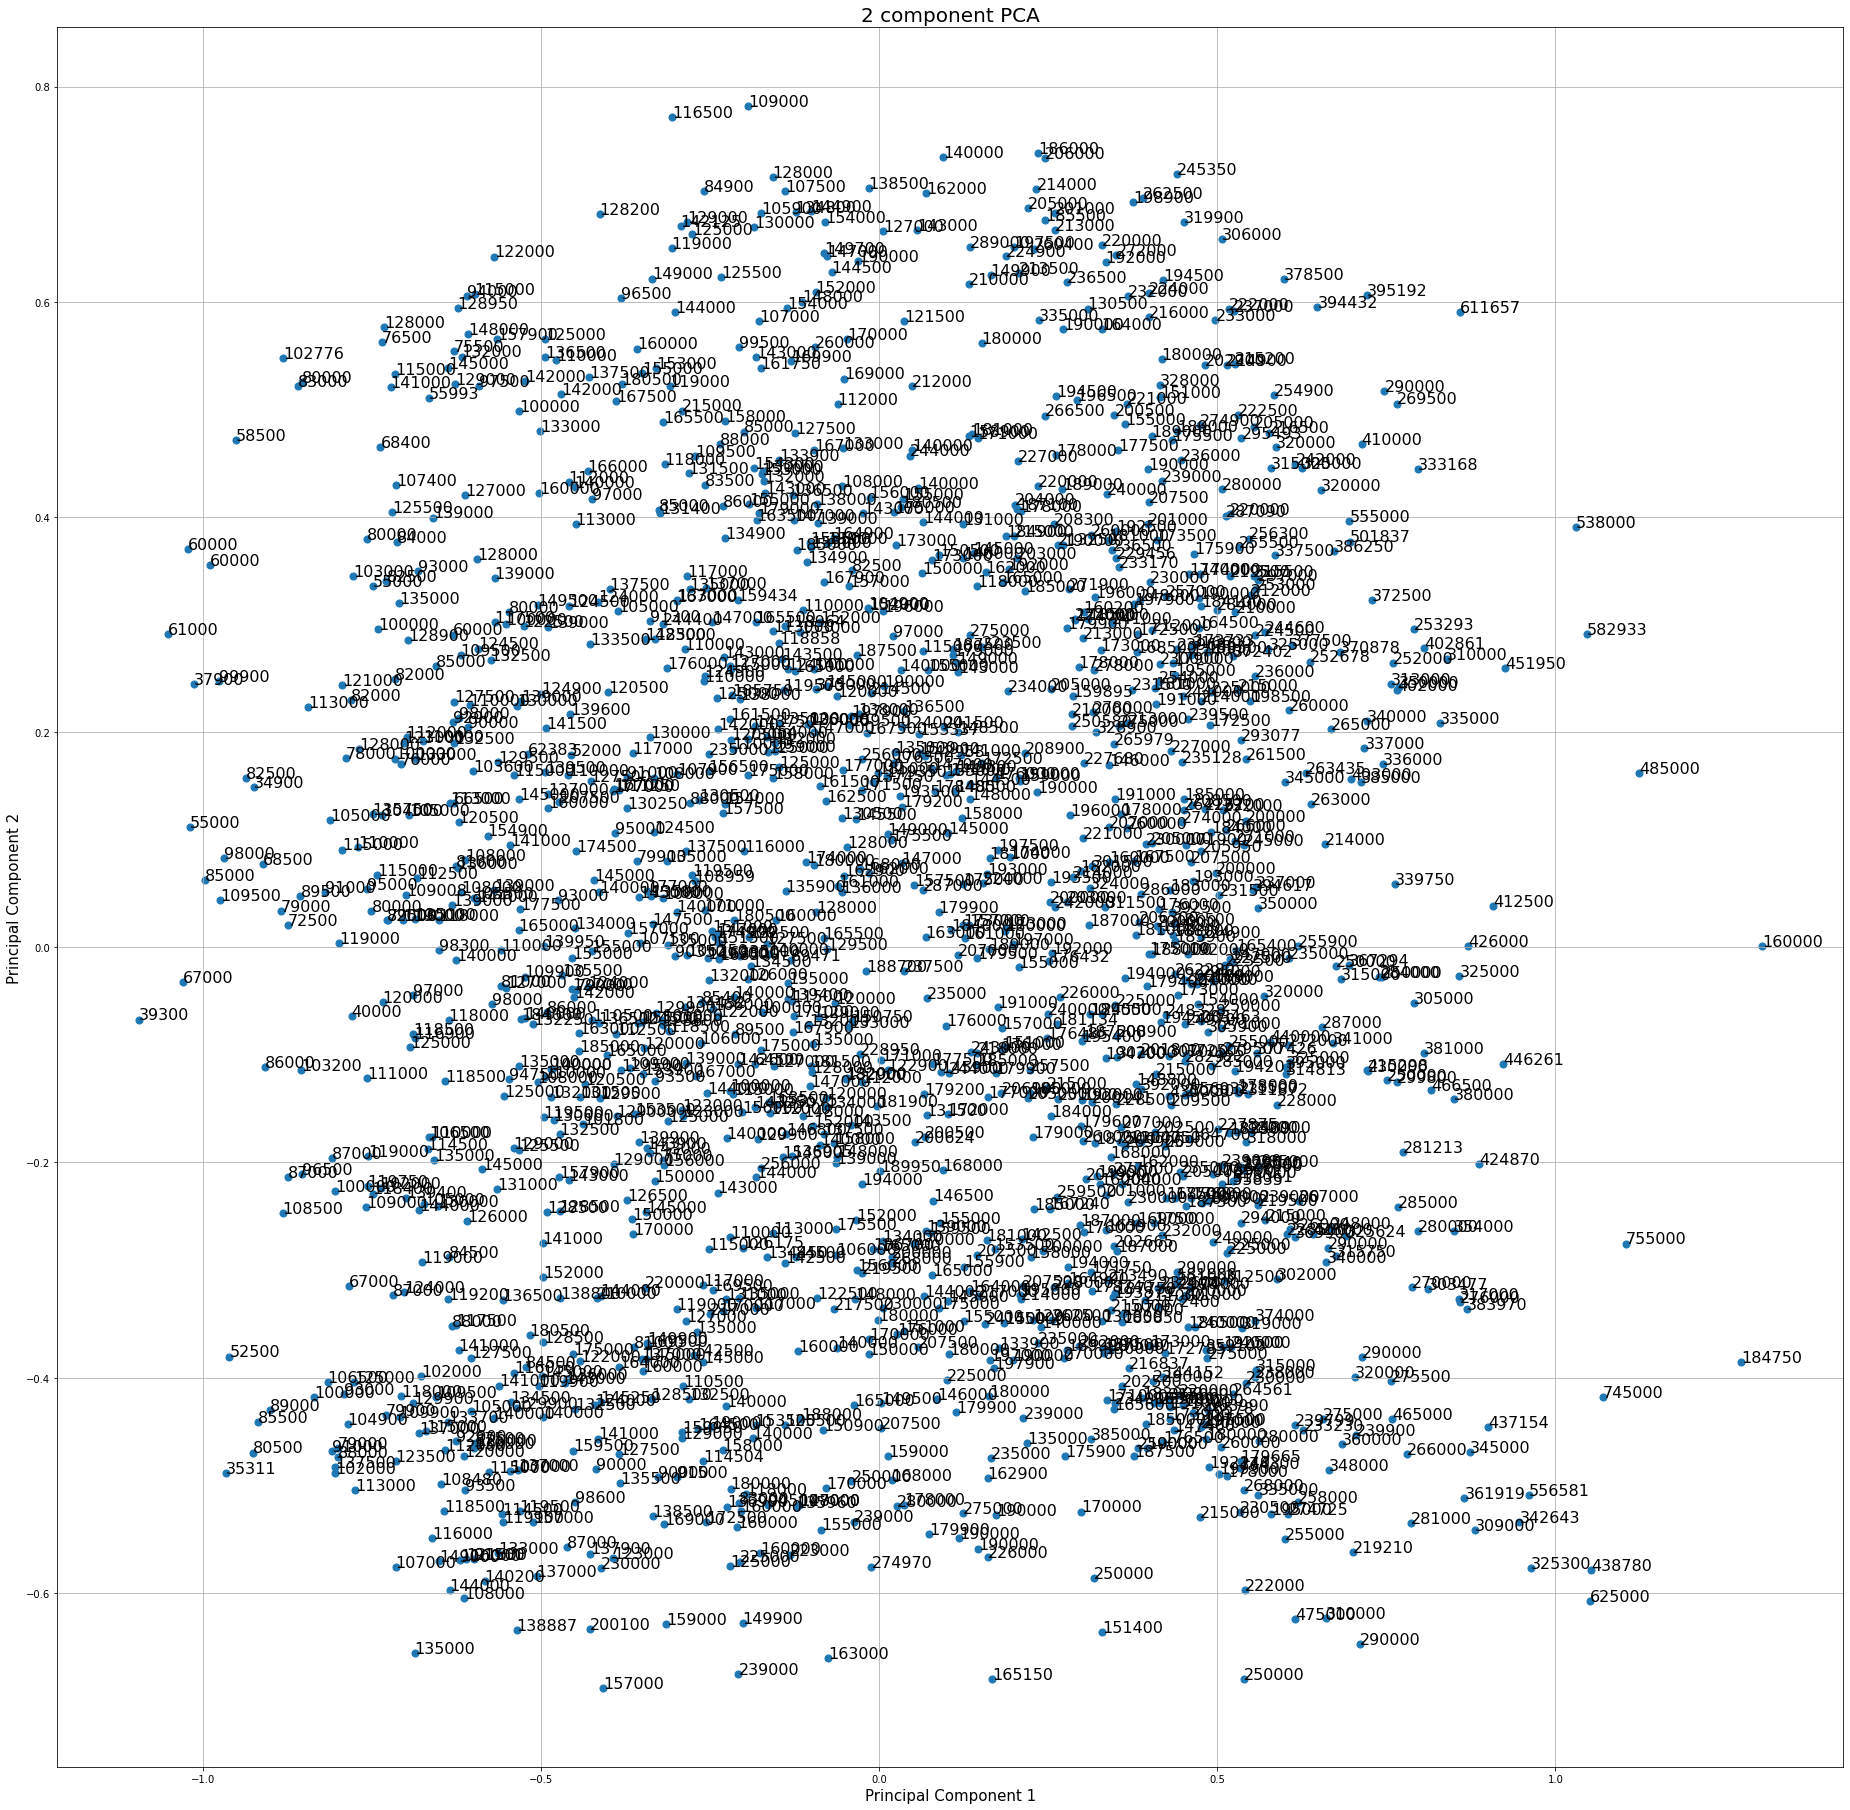

In [15]:
fig = plt.figure(figsize = (32,32))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2']
               , s = 50)
for i, num in enumerate(finalDf['SalePrice']):
    ax.text(finalDf['principal component 1'][i], finalDf['principal component 2'][i], num, fontsize=16)
ax.grid()

In [16]:
### PCA veriyi sadece numerik verileri kullanarak gruplara ayırmak konusunda başarısız, 
### veriler bir kaç istisna dışında tek bir yere kümelenmiş durumda.

In [17]:
### Kategorik veriler için OneHot Encoding

In [18]:
preprocess_list = []

for col in df_w.columns:
    if df_w[col].dtype == "object":
        preprocess_list.append(col)

df_pp = df_w[preprocess_list].copy()

In [19]:
# label encoding PCA için uygunsuz
# lab_enc = pp.LabelEncoder()
# df_pp = df_pp.replace(np.nan, 'None', regex=True)
# df_pp[preprocess_list] = df_pp[preprocess_list].apply(lambda col: lab_enc.fit_transform(col))

In [20]:
# pandas fonksiyonu ile one hot encoding
dfOnehot = pd.get_dummies(df_pp)

In [21]:
print("One hot encoding öncesi kategorik değerler:{}".format(df_pp.shape))

# sütun sayısı 214 e yükseldi
print("One hot encoding sonrası kategorik değerler:{}".format(dfOnehot.shape))

One hot encoding öncesi kategorik değerler:(1460, 34)
One hot encoding sonrası kategorik değerler:(1460, 214)


In [22]:
# sklearn ile One hot encoding
# ohe = pp.OneHotEncoder(sparse=False ) 
# onehot_encoded = ohe.fit(df_pp)

In [23]:
### numerik ve one hot encoded kategorik verileri birleştirdik
preprocessed_df = pd.concat([dfOnehot, std_numeric_df], axis = 1)
# toplam sütun sayısı 244
preprocessed_df.shape
X = preprocessed_df.values # salePrice hariç değerler PCA'e sokulacak

In [24]:
X_std = X.astype(np.int64) #float değeler yuvarlandı

In [25]:
pca = dc.PCA(n_components=2)
principalComponents_All = pca.fit_transform(X_std)
principalDf_All = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [37]:
principalDf_All = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

(1460, 81)

In [35]:
principalComponents_All.shape

(1460, 2)

In [27]:
preproc_finalDf = pd.concat([principalDf_All, df_w[['SalePrice']]], axis = 1)

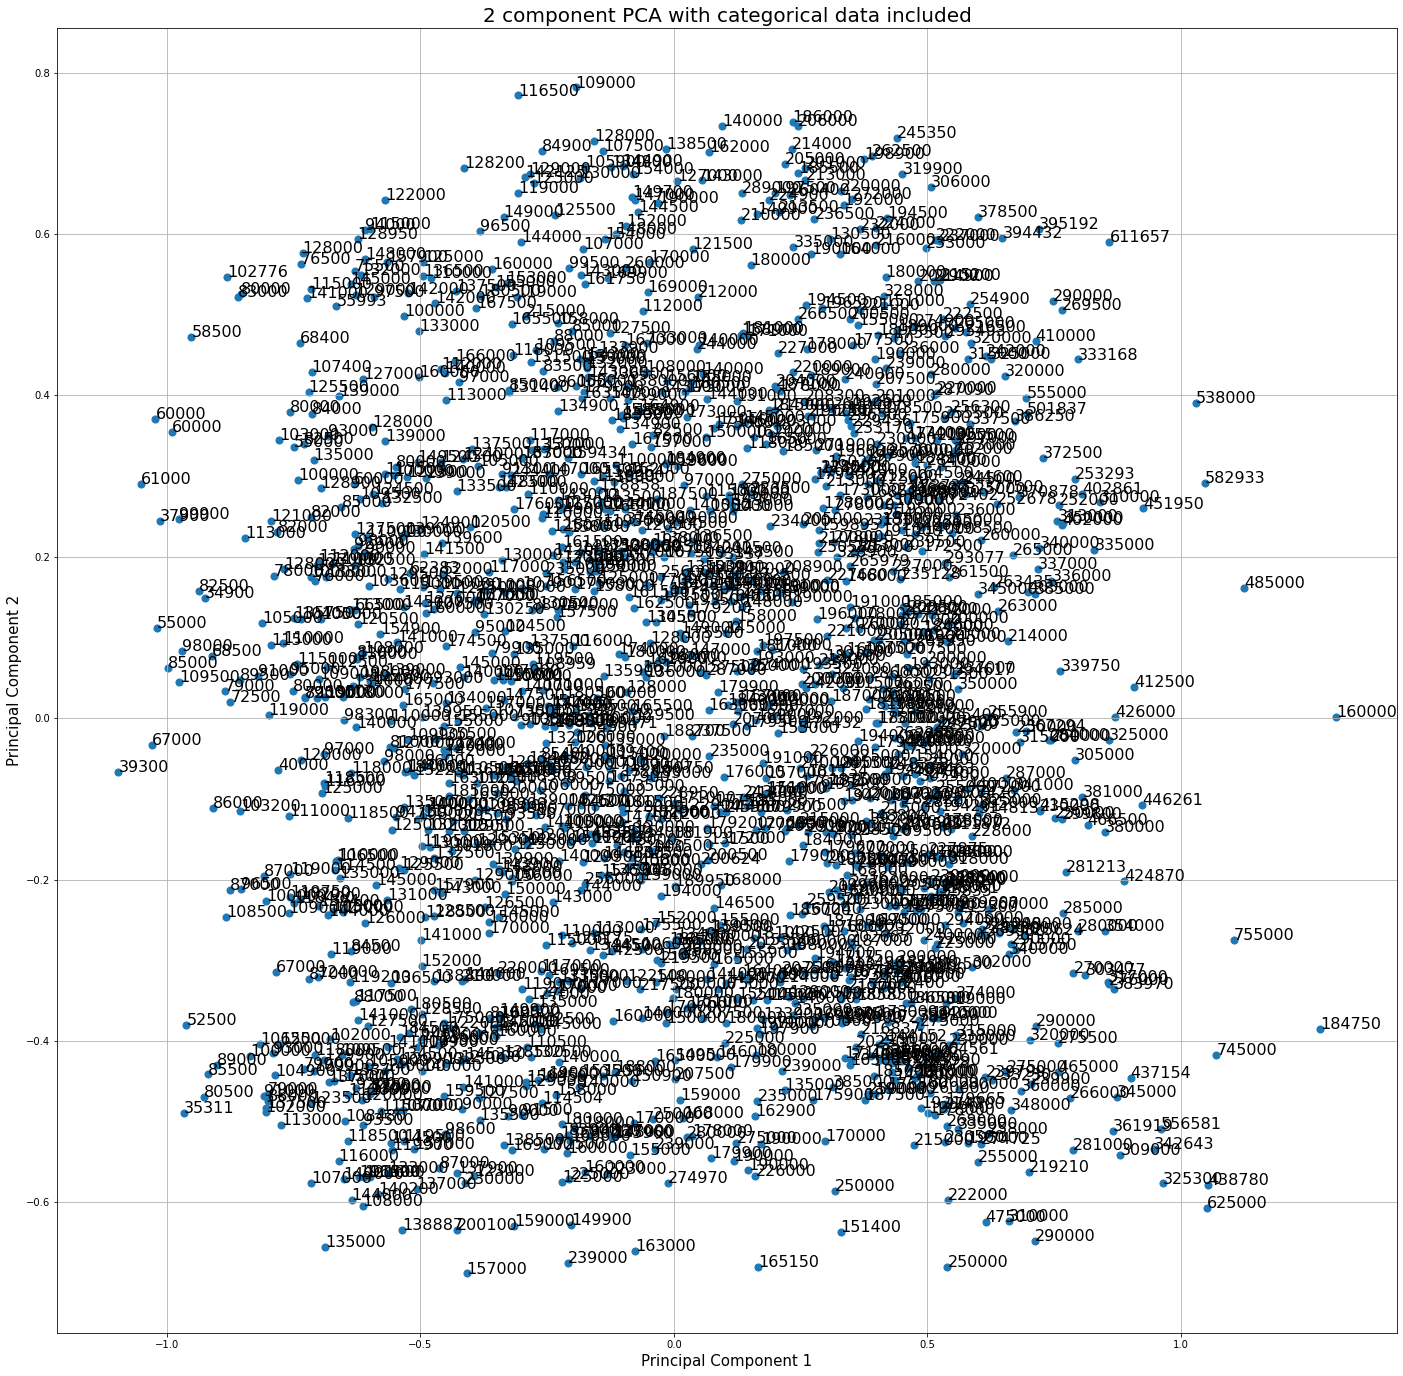

In [28]:
fig = plt.figure(figsize = (24,24))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA with categorical data included', fontsize = 20)
ax.scatter(preproc_finalDf['principal component 1']
               , preproc_finalDf['principal component 2']
               , s = 50)
for i, num in enumerate(preproc_finalDf['SalePrice']):
    ax.text(preproc_finalDf['principal component 1'][i], preproc_finalDf['principal component 2'][i], num, fontsize=16)
ax.grid()

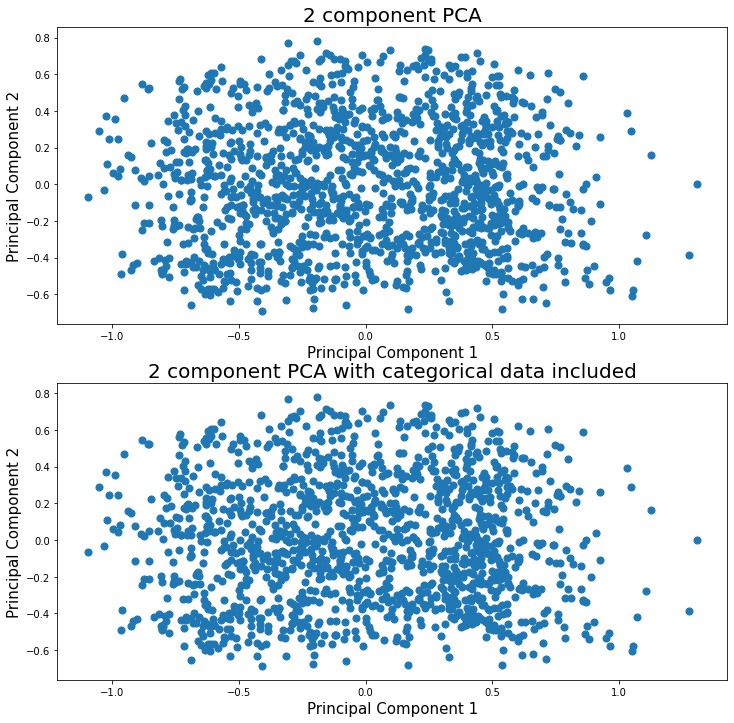

In [29]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(2,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(preproc_finalDf['principal component 1']
               , preproc_finalDf['principal component 2']
               , s = 50)

ax = fig.add_subplot(2,1,2) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA with categorical data included', fontsize = 20)
ax.scatter(finalDf['principal component 1']
               , finalDf['principal component 2']
               , s = 50)

In [30]:
# renklendirme için fiyat aralığı incelenir:
print(df_w["SalePrice"].max())
print(df_w["SalePrice"].min())

755000
34900


In [31]:
df_w["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [32]:
# standart sapma göz önüne alınarak fiyat değişimine göre kategoriler (renklendirme için) belirlenir
colors = [int((x/79442)) for x in df_w["SalePrice"]]
colors = np.array(colors)

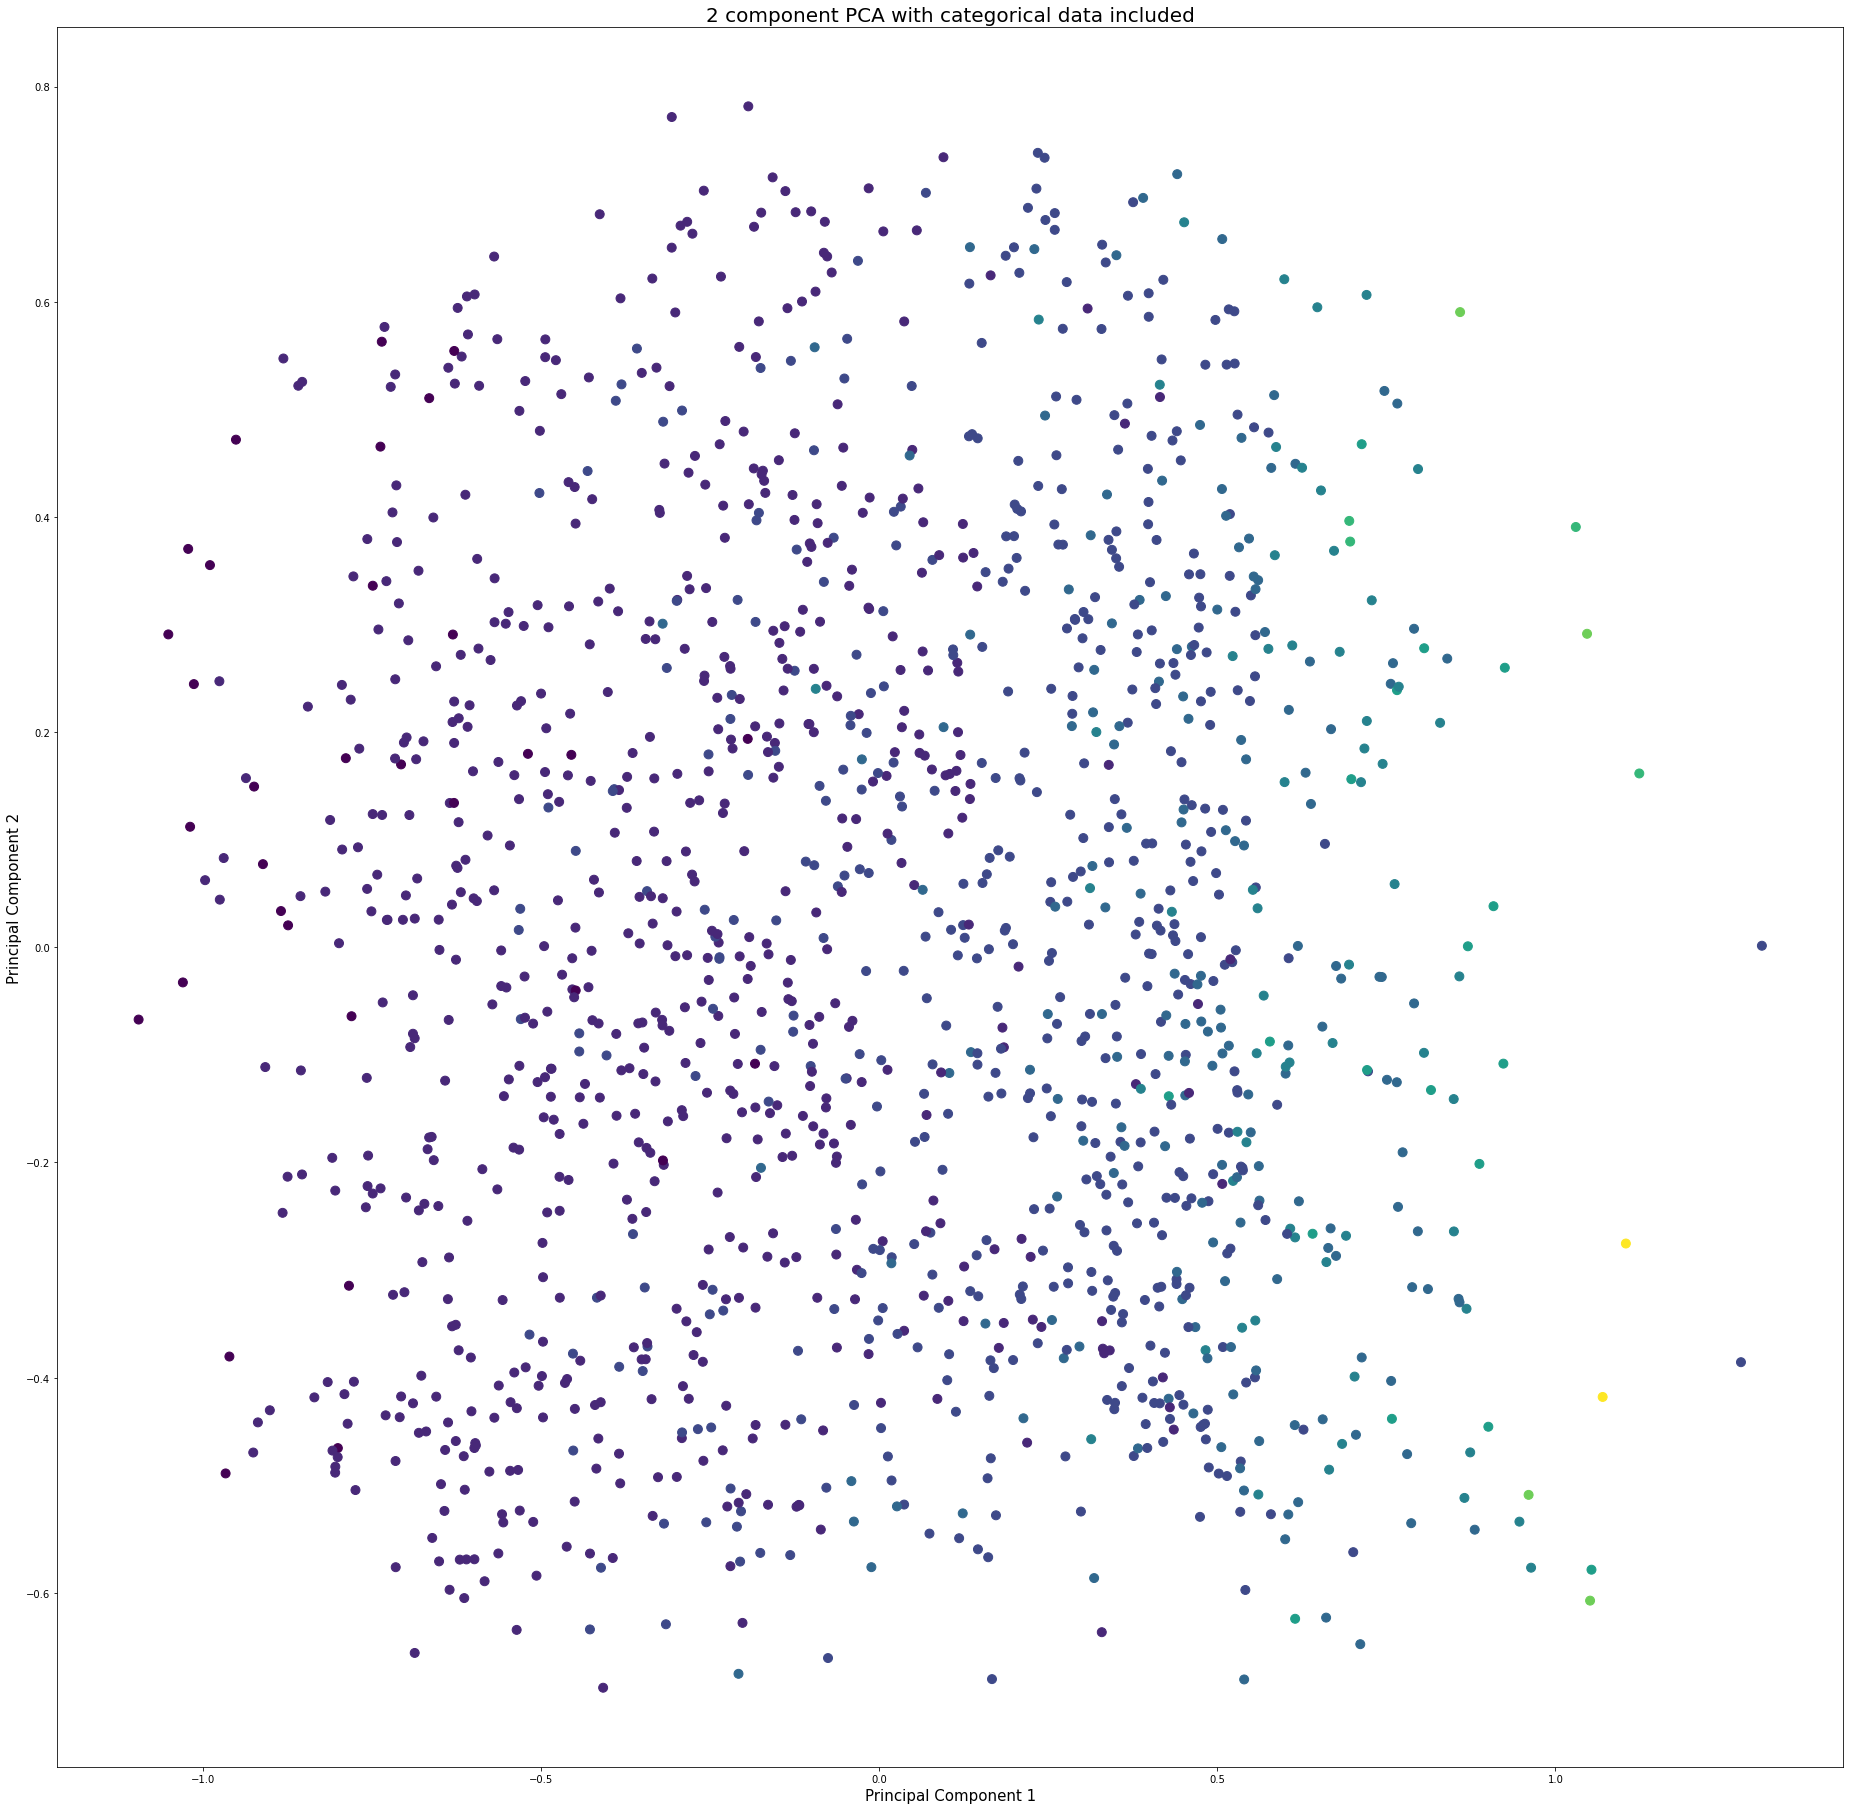

In [33]:
fig = plt.figure(figsize = (32,32))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA with categorical data included', fontsize = 20)
ax.scatter(preproc_finalDf['principal component 1']
               , preproc_finalDf['principal component 2']
               , s = 80
               , c = colors)

In [34]:
## SONUÇ: PCA başarısız! Gözlemlenen tek etki PC1 baz alınırken -1 den 1 e doğru ev fiyatlarının genel artışı.